# Importing important  libraries

In [1]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
import sklearn.metrics as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('H2HBABBA2787.csv') ## reading data
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200782669,SYGMA trust,2019-07-11 00:00:00,2019.0,1.929540e+09,2019-06-25,20190625,20190625,20190710.0,USD,RV,1.0,NaN,1218.03,20190625.0,NAA8,1.929540e+09,0
1,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930681e+09,2020-03-20,20200320,20200320,20200404.0,USD,RV,1.0,NaN,943.12,20200320.0,NAH4,1.930681e+09,1
2,U001,0200726979,BJ'S corp,2019-08-19 00:00:00,2019.0,1.929695e+09,2019-08-03,20190803,20190803,20190818.0,USD,RV,1.0,NaN,405.75,20190803.0,NAA8,1.929695e+09,0
3,U001,0200769623,WAL-MAR co,2019-09-23 00:00:00,2019.0,1.929864e+09,2019-09-11,20190911,20190911,20190926.0,USD,RV,1.0,NaN,3702.21,20190911.0,NAH4,1.929864e+09,0
4,U001,0200900909,SYSCO systems,2019-09-03 00:00:00,2019.0,1.929755e+09,2019-08-16,20190817,20190816,20190831.0,USD,RV,1.0,NaN,6251.17,20190816.0,NAA8,1.929755e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200416837,DEC systems,2019-12-11 00:00:00,2019.0,1.930227e+09,2019-12-06,20191206,20191206,20191208.0,USD,RV,1.0,NaN,9139.97,20191201.0,NAM1,1.930227e+09,0
49996,U001,0200762301,C&S WH in,2020-02-25 00:00:00,2020.0,1.930505e+09,2020-02-10,20200209,20200210,20200225.0,USD,RV,1.0,NaN,18512.63,20200210.0,NAC6,1.930505e+09,0
49997,U001,0200769623,WAL-MAR corporation,2019-10-08 00:00:00,2019.0,1.929932e+09,2019-09-27,20190926,20190927,20191012.0,USD,RV,1.0,NaN,14922.49,20190927.0,NAH4,1.929932e+09,0
49998,CA02,0140106408,WAL-M associates,2019-08-13 00:00:00,2019.0,2.960568e+09,2019-07-26,20190726,20190726,20190805.0,CAD,RV,1.0,NaN,9139.45,20190726.0,CA10,2.960568e+09,0


# MILESTONE - 1 

# Data Preprocessing

In [3]:
df.columns ## show all column names

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [4]:
df.isnull().sum() ## Finding number of null values in each column.

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    8
isOpen                        0
dtype: int64

We can see that there are NULL values in clear_date --> which we will use to split in test and train later.     
area_business is totally NULL. 
There are 8 NULL values in invoice_id, we'll look into it later.

### Date-Time Conversion

In [5]:
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'],format='%Y%m%d')
df['document_create_date.1'].head()

0   2019-06-25
1   2020-03-20
2   2019-08-03
3   2019-09-11
4   2019-08-16
Name: document_create_date.1, dtype: datetime64[ns]

In [6]:
df['clear_date']=pd.to_datetime(df['clear_date'],format='%Y-%m-%d %H:%M:%S')
df['clear_date'].head()

0   2019-07-11
1          NaT
2   2019-08-19
3   2019-09-23
4   2019-09-03
Name: clear_date, dtype: datetime64[ns]

In [7]:
df['posting_date']=pd.to_datetime(df['posting_date'],format='%Y-%m-%d')
df['posting_date'].head()

0   2019-06-25
1   2020-03-20
2   2019-08-03
3   2019-09-11
4   2019-08-16
Name: posting_date, dtype: datetime64[ns]

In [8]:
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['due_in_date'].head()

0   2019-07-10
1   2020-04-04
2   2019-08-18
3   2019-09-26
4   2019-08-31
Name: due_in_date, dtype: datetime64[ns]

In [9]:
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')
df['baseline_create_date'].head()

0   2019-06-25
1   2020-03-20
2   2019-08-03
3   2019-09-11
4   2019-08-16
Name: baseline_create_date, dtype: datetime64[ns]

In [10]:
# looking at the converted data-types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  float64       
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  int64         
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  float6

In [11]:
df1 = df.copy()
df1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200782669,SYGMA trust,2019-07-11,2019.0,1.929540e+09,2019-06-25,20190625,2019-06-25,2019-07-10,USD,RV,1.0,NaN,1218.03,2019-06-25,NAA8,1.929540e+09,0
1,U001,0200769623,WAL-MAR foundation,NaT,2020.0,1.930681e+09,2020-03-20,20200320,2020-03-20,2020-04-04,USD,RV,1.0,NaN,943.12,2020-03-20,NAH4,1.930681e+09,1
2,U001,0200726979,BJ'S corp,2019-08-19,2019.0,1.929695e+09,2019-08-03,20190803,2019-08-03,2019-08-18,USD,RV,1.0,NaN,405.75,2019-08-03,NAA8,1.929695e+09,0
3,U001,0200769623,WAL-MAR co,2019-09-23,2019.0,1.929864e+09,2019-09-11,20190911,2019-09-11,2019-09-26,USD,RV,1.0,NaN,3702.21,2019-09-11,NAH4,1.929864e+09,0
4,U001,0200900909,SYSCO systems,2019-09-03,2019.0,1.929755e+09,2019-08-16,20190817,2019-08-16,2019-08-31,USD,RV,1.0,NaN,6251.17,2019-08-16,NAA8,1.929755e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200416837,DEC systems,2019-12-11,2019.0,1.930227e+09,2019-12-06,20191206,2019-12-06,2019-12-08,USD,RV,1.0,NaN,9139.97,2019-12-01,NAM1,1.930227e+09,0
49996,U001,0200762301,C&S WH in,2020-02-25,2020.0,1.930505e+09,2020-02-10,20200209,2020-02-10,2020-02-25,USD,RV,1.0,NaN,18512.63,2020-02-10,NAC6,1.930505e+09,0
49997,U001,0200769623,WAL-MAR corporation,2019-10-08,2019.0,1.929932e+09,2019-09-27,20190926,2019-09-27,2019-10-12,USD,RV,1.0,NaN,14922.49,2019-09-27,NAH4,1.929932e+09,0
49998,CA02,0140106408,WAL-M associates,2019-08-13,2019.0,2.960568e+09,2019-07-26,20190726,2019-07-26,2019-08-05,CAD,RV,1.0,NaN,9139.45,2019-07-26,CA10,2.960568e+09,0


### Dropping columns with ALL NULL values.

In [12]:
df.dropna(axis=1,how='all',inplace=True)
df.shape

(50000, 18)

area_business was dropped.

### Dropping null values in invoice id
invoice id has only 49992 unique values of 50000. So let's analyse it a bit.

In [13]:
df["document type"].value_counts()

RV    49992
X2        8
Name: document type, dtype: int64

We see that where the invoice id is missing the document type is X2 and posting date is different from document create date. Since their are only 8 values and invoice_id needs to be unique we can drop these rows

In [14]:
df.dropna(axis=0,subset=['invoice_id'],inplace=True)
df.reset_index(drop=True,inplace=True)
df.shape
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200782669,SYGMA trust,2019-07-11,2019.0,1.929540e+09,2019-06-25,20190625,2019-06-25,2019-07-10,USD,RV,1.0,1218.03,2019-06-25,NAA8,1.929540e+09,0
1,U001,0200769623,WAL-MAR foundation,NaT,2020.0,1.930681e+09,2020-03-20,20200320,2020-03-20,2020-04-04,USD,RV,1.0,943.12,2020-03-20,NAH4,1.930681e+09,1
2,U001,0200726979,BJ'S corp,2019-08-19,2019.0,1.929695e+09,2019-08-03,20190803,2019-08-03,2019-08-18,USD,RV,1.0,405.75,2019-08-03,NAA8,1.929695e+09,0
3,U001,0200769623,WAL-MAR co,2019-09-23,2019.0,1.929864e+09,2019-09-11,20190911,2019-09-11,2019-09-26,USD,RV,1.0,3702.21,2019-09-11,NAH4,1.929864e+09,0
4,U001,0200900909,SYSCO systems,2019-09-03,2019.0,1.929755e+09,2019-08-16,20190817,2019-08-16,2019-08-31,USD,RV,1.0,6251.17,2019-08-16,NAA8,1.929755e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49987,U001,0200416837,DEC systems,2019-12-11,2019.0,1.930227e+09,2019-12-06,20191206,2019-12-06,2019-12-08,USD,RV,1.0,9139.97,2019-12-01,NAM1,1.930227e+09,0
49988,U001,0200762301,C&S WH in,2020-02-25,2020.0,1.930505e+09,2020-02-10,20200209,2020-02-10,2020-02-25,USD,RV,1.0,18512.63,2020-02-10,NAC6,1.930505e+09,0
49989,U001,0200769623,WAL-MAR corporation,2019-10-08,2019.0,1.929932e+09,2019-09-27,20190926,2019-09-27,2019-10-12,USD,RV,1.0,14922.49,2019-09-27,NAH4,1.929932e+09,0
49990,CA02,0140106408,WAL-M associates,2019-08-13,2019.0,2.960568e+09,2019-07-26,20190726,2019-07-26,2019-08-05,CAD,RV,1.0,9139.45,2019-07-26,CA10,2.960568e+09,0


### Checking for unique values in each column

In [15]:
for cols in df.columns:
    print(f"{cols} - {df[f'{cols}'].nunique()}")

business_code - 6
cust_number - 1379
name_customer - 4164
clear_date - 400
buisness_year - 2
doc_id - 48784
posting_date - 501
document_create_date - 505
document_create_date.1 - 501
due_in_date - 547
invoice_currency - 2
document type - 1
posting_id - 1
total_open_amount - 44149
baseline_create_date - 500
cust_payment_terms - 79
invoice_id - 48784
isOpen - 2


There is only 1 unique value in document type and posting_id. We can drop these.

In [16]:
df.drop('document type',axis=1,inplace=True)

In [17]:
df.drop('posting_id',axis=1,inplace=True)

In [18]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200782669,SYGMA trust,2019-07-11,2019.0,1.929540e+09,2019-06-25,20190625,2019-06-25,2019-07-10,USD,1218.03,2019-06-25,NAA8,1.929540e+09,0
1,U001,0200769623,WAL-MAR foundation,NaT,2020.0,1.930681e+09,2020-03-20,20200320,2020-03-20,2020-04-04,USD,943.12,2020-03-20,NAH4,1.930681e+09,1
2,U001,0200726979,BJ'S corp,2019-08-19,2019.0,1.929695e+09,2019-08-03,20190803,2019-08-03,2019-08-18,USD,405.75,2019-08-03,NAA8,1.929695e+09,0
3,U001,0200769623,WAL-MAR co,2019-09-23,2019.0,1.929864e+09,2019-09-11,20190911,2019-09-11,2019-09-26,USD,3702.21,2019-09-11,NAH4,1.929864e+09,0
4,U001,0200900909,SYSCO systems,2019-09-03,2019.0,1.929755e+09,2019-08-16,20190817,2019-08-16,2019-08-31,USD,6251.17,2019-08-16,NAA8,1.929755e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49987,U001,0200416837,DEC systems,2019-12-11,2019.0,1.930227e+09,2019-12-06,20191206,2019-12-06,2019-12-08,USD,9139.97,2019-12-01,NAM1,1.930227e+09,0
49988,U001,0200762301,C&S WH in,2020-02-25,2020.0,1.930505e+09,2020-02-10,20200209,2020-02-10,2020-02-25,USD,18512.63,2020-02-10,NAC6,1.930505e+09,0
49989,U001,0200769623,WAL-MAR corporation,2019-10-08,2019.0,1.929932e+09,2019-09-27,20190926,2019-09-27,2019-10-12,USD,14922.49,2019-09-27,NAH4,1.929932e+09,0
49990,CA02,0140106408,WAL-M associates,2019-08-13,2019.0,2.960568e+09,2019-07-26,20190726,2019-07-26,2019-08-05,CAD,9139.45,2019-07-26,CA10,2.960568e+09,0


Now let's check for NULL values again.

In [19]:
df.isnull().any()

business_code             False
cust_number               False
name_customer             False
clear_date                 True
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
invoice_currency          False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                False
isOpen                    False
dtype: bool

No null(except clear-date) values so moving on to removing duplicate columns.

### Duplicate column removal

In [20]:
# function to find duplicate columns
def findDuplicateColumns(df):
    duplicatecolumns=set()
    for x in range(df.shape[1]):
        col1=df.iloc[:,x]
        for y in range(x+1,df.shape[1]):
            col2=df.iloc[:,y]
            if col1.equals(col2):
                duplicatecolumns.add(df.columns.values[x])
    return list(duplicatecolumns)

In [21]:
dupcol=findDuplicateColumns(df)
dupcol

['posting_date', 'doc_id']

In [22]:
df.drop(columns=dupcol,inplace=True) 

We dropped posting_date and doc_id.

Since,document_create_date and document_create_date.1 are similar, we drop document_create_date and instead use document_create_date.1

In [23]:
df.drop(columns=['document_create_date'],inplace=True)

Also, invoice id is unique for each transaction and don't affect the sales, so we drop it.

In [24]:
df.drop(columns=['invoice_id'],inplace=True) 
df

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,200782669,SYGMA trust,2019-07-11,2019.0,2019-06-25,2019-07-10,USD,1218.03,2019-06-25,NAA8,0
1,U001,0200769623,WAL-MAR foundation,NaT,2020.0,2020-03-20,2020-04-04,USD,943.12,2020-03-20,NAH4,1
2,U001,0200726979,BJ'S corp,2019-08-19,2019.0,2019-08-03,2019-08-18,USD,405.75,2019-08-03,NAA8,0
3,U001,0200769623,WAL-MAR co,2019-09-23,2019.0,2019-09-11,2019-09-26,USD,3702.21,2019-09-11,NAH4,0
4,U001,0200900909,SYSCO systems,2019-09-03,2019.0,2019-08-16,2019-08-31,USD,6251.17,2019-08-16,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49987,U001,0200416837,DEC systems,2019-12-11,2019.0,2019-12-06,2019-12-08,USD,9139.97,2019-12-01,NAM1,0
49988,U001,0200762301,C&S WH in,2020-02-25,2020.0,2020-02-10,2020-02-25,USD,18512.63,2020-02-10,NAC6,0
49989,U001,0200769623,WAL-MAR corporation,2019-10-08,2019.0,2019-09-27,2019-10-12,USD,14922.49,2019-09-27,NAH4,0
49990,CA02,0140106408,WAL-M associates,2019-08-13,2019.0,2019-07-26,2019-08-05,CAD,9139.45,2019-07-26,CA10,0


# The target variable
Our model cant take in dates for prediction so our target column will not be clear_date. Instead it will be the pay_delay column as delay will be in int format which our model can predict.

clear_date - due_date will tell us how much delay was there in paying. 
 
Neagative value indicates it has been paid off before due date. 
Positive value indicates it has been paid off after the due date

In [25]:
df['pay_delay']=(df['clear_date']-df['due_in_date']).dt.days

Sorting in ascending order by document_create_date.1

## Now, we sort the data based on document_create_date.1

In [26]:
df.sort_values(by='document_create_date.1',inplace=True) # sorting in ascending order by document_create_date.1
df

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,pay_delay
29292,U001,0200769623,WAL-MAR associates,2019-01-10,2019.0,2018-12-30,2019-01-14,USD,61712.29,2018-12-30,NAH4,0,-4.0
11480,U001,0200769623,WAL-MAR corp,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,11682.88,2018-12-30,NAH4,0,1.0
21485,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,2018-12-30,2019-01-14,USD,1448.77,2018-12-30,NAH4,0,-4.0
14112,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,26831.71,2018-12-30,NAH4,0,-5.0
47051,U001,0200769623,WAL-MAR in,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,38472.57,2018-12-30,NAH4,0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47554,CA02,0140106408,WAL-M corp,NaT,2020.0,2020-05-14,2020-05-26,CAD,55850.46,2020-05-16,CA10,1,NaN
25371,U001,0200915438,GROC corporation,NaT,2020.0,2020-05-15,2020-05-30,USD,24212.00,2020-05-15,NAA8,1,NaN
26357,U001,0200457993,SHAM co,NaT,2020.0,2020-05-15,2020-05-30,USD,19798.67,2020-05-15,NAA8,1,NaN
39540,CA02,0100027744,OMEGA AD trust,NaT,2020.0,2020-05-16,2020-05-16,CAD,1440.00,2020-05-16,CAB1,1,NaN


# SPLITTING
Creating test set on null clear_date

In [27]:
test_m = df[df.clear_date.isnull()].reset_index()
test_m.drop(columns=['index'],inplace=True)
test_m

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,pay_delay
0,U001,0200762301,C&S WH foundation,NaT,2020.0,2020-02-27,2020-03-13,USD,5069.90,2020-02-27,NAC6,1,NaN
1,U001,0200705742,DOT foundation,NaT,2020.0,2020-02-27,2020-03-13,USD,20787.23,2020-02-27,NAA8,1,NaN
2,U001,CCU013,KRAFT F,NaT,2020.0,2020-02-27,2020-02-27,USD,19992.18,2020-02-27,NAX2,1,NaN
3,U001,0200792734,MDV/,NaT,2020.0,2020-02-27,2020-03-13,USD,87769.40,2020-02-27,NAA8,1,NaN
4,CA02,0140106408,WAL-M trust,NaT,2020.0,2020-02-27,2020-03-09,CAD,31833.76,2020-02-28,CA10,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CA02,0140106408,WAL-M corp,NaT,2020.0,2020-05-14,2020-05-26,CAD,55850.46,2020-05-16,CA10,1,NaN
9996,U001,0200915438,GROC corporation,NaT,2020.0,2020-05-15,2020-05-30,USD,24212.00,2020-05-15,NAA8,1,NaN
9997,U001,0200457993,SHAM co,NaT,2020.0,2020-05-15,2020-05-30,USD,19798.67,2020-05-15,NAA8,1,NaN
9998,CA02,0100027744,OMEGA AD trust,NaT,2020.0,2020-05-16,2020-05-16,CAD,1440.00,2020-05-16,CAB1,1,NaN


In [28]:
tester = test_m.copy() ## Making a safe copy of test_m set

Splitting test_set into x_test and y_test

In [29]:
y_test = test_m["pay_delay"]
y_test

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9995   NaN
9996   NaN
9997   NaN
9998   NaN
9999   NaN
Name: pay_delay, Length: 10000, dtype: float64

In [30]:
x_test = test_m.iloc[:,:-1].copy()
x_test

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200762301,C&S WH foundation,NaT,2020.0,2020-02-27,2020-03-13,USD,5069.90,2020-02-27,NAC6,1
1,U001,0200705742,DOT foundation,NaT,2020.0,2020-02-27,2020-03-13,USD,20787.23,2020-02-27,NAA8,1
2,U001,CCU013,KRAFT F,NaT,2020.0,2020-02-27,2020-02-27,USD,19992.18,2020-02-27,NAX2,1
3,U001,0200792734,MDV/,NaT,2020.0,2020-02-27,2020-03-13,USD,87769.40,2020-02-27,NAA8,1
4,CA02,0140106408,WAL-M trust,NaT,2020.0,2020-02-27,2020-03-09,CAD,31833.76,2020-02-28,CA10,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CA02,0140106408,WAL-M corp,NaT,2020.0,2020-05-14,2020-05-26,CAD,55850.46,2020-05-16,CA10,1
9996,U001,0200915438,GROC corporation,NaT,2020.0,2020-05-15,2020-05-30,USD,24212.00,2020-05-15,NAA8,1
9997,U001,0200457993,SHAM co,NaT,2020.0,2020-05-15,2020-05-30,USD,19798.67,2020-05-15,NAA8,1
9998,CA02,0100027744,OMEGA AD trust,NaT,2020.0,2020-05-16,2020-05-16,CAD,1440.00,2020-05-16,CAB1,1


### Creating a seprate data frame out of which we will extract val, test and final train set.
WHOLE DATA ---> [TRAIN_DATA + VAL (1.5 MONTHS) + TEST (1.5 MONTHS)] + TEST_DATA

In [31]:
train_data2 = df[df.clear_date.notnull()].reset_index() #train set on non-null clear date
train_data2.drop(columns=['index'],inplace=True)
train_data2

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,pay_delay
0,U001,0200769623,WAL-MAR associates,2019-01-10,2019.0,2018-12-30,2019-01-14,USD,61712.29,2018-12-30,NAH4,0,-4.0
1,U001,0200769623,WAL-MAR corp,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,11682.88,2018-12-30,NAH4,0,1.0
2,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,2018-12-30,2019-01-14,USD,1448.77,2018-12-30,NAH4,0,-4.0
3,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,26831.71,2018-12-30,NAH4,0,-5.0
4,U001,0200769623,WAL-MAR in,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,38472.57,2018-12-30,NAH4,0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39987,U001,0200764795,SYSCO foundation,2020-03-16,2020.0,2020-02-26,2020-03-12,USD,988.34,2020-02-26,NAA8,0,4.0
39988,U001,0200769623,WAL-MAR in,2020-03-09,2020.0,2020-02-26,2020-03-12,USD,5507.47,2020-02-26,NAH4,0,-3.0
39989,U001,0200759082,INGL trust,2020-03-12,2020.0,2020-02-26,2020-03-12,USD,22256.28,2020-02-26,NAA8,0,0.0
39990,U001,0200769623,WAL-MAR systems,2020-03-09,2020.0,2020-02-26,2020-03-12,USD,1356.55,2020-02-26,NAH4,0,-3.0


In [32]:
# Making use of offset to find date 1.5 months prior to 2020-02-27
x1 = train_data2['document_create_date.1'].iloc[-1] - pd.DateOffset(months=1, days=15)
y1 = train_data2['document_create_date.1'].loc[train_data2['document_create_date.1'] <= x1].iloc[-1]
print(y1) 
train_data2['document_create_date.1'].loc[train_data2['document_create_date.1'] == y1].last_valid_index()

2020-01-12 00:00:00


35812

35812nd row gives the date which is 1.5 months prior to 2020-02-27.

In [33]:
# dataframe for test
test = train_data2.iloc[35812: , :].copy()
test.reset_index(drop=True,inplace=True)
test

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,pay_delay
0,U001,0100031704,DELHAIZE corp,2020-01-30,2020.0,2020-01-12,2020-01-27,USD,59249.03,2020-01-12,NAA8,0,3.0
1,U001,0200794332,COST us,2020-01-27,2020.0,2020-01-13,2020-01-28,USD,7184.83,2020-01-13,NAAX,0,-1.0
2,U001,0200769623,WAL-MAR corp,2020-01-23,2020.0,2020-01-13,2020-01-28,USD,5118.19,2020-01-13,NAH4,0,-5.0
3,U001,0200782001,GORDO corp,2020-01-29,2020.0,2020-01-13,2020-01-28,USD,23784.11,2020-01-13,NAA8,0,1.0
4,U001,0200711029,WEGMAN trust,2020-01-28,2020.0,2020-01-13,2020-01-28,USD,59374.46,2020-01-13,NAA8,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,U001,0200764795,SYSCO foundation,2020-03-16,2020.0,2020-02-26,2020-03-12,USD,988.34,2020-02-26,NAA8,0,4.0
4176,U001,0200769623,WAL-MAR in,2020-03-09,2020.0,2020-02-26,2020-03-12,USD,5507.47,2020-02-26,NAH4,0,-3.0
4177,U001,0200759082,INGL trust,2020-03-12,2020.0,2020-02-26,2020-03-12,USD,22256.28,2020-02-26,NAA8,0,0.0
4178,U001,0200769623,WAL-MAR systems,2020-03-09,2020.0,2020-02-26,2020-03-12,USD,1356.55,2020-02-26,NAH4,0,-3.0


Removing test from train_data2 and storing into new dataframe to extract val.

In [34]:
train_data1 = pd.concat([train_data2, test]).drop_duplicates(keep=False)
train_data1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,pay_delay
0,U001,0200769623,WAL-MAR associates,2019-01-10,2019.0,2018-12-30,2019-01-14,USD,61712.29,2018-12-30,NAH4,0,-4.0
1,U001,0200769623,WAL-MAR corp,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,11682.88,2018-12-30,NAH4,0,1.0
2,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,2018-12-30,2019-01-14,USD,1448.77,2018-12-30,NAH4,0,-4.0
3,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,26831.71,2018-12-30,NAH4,0,-5.0
4,U001,0200769623,WAL-MAR in,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,38472.57,2018-12-30,NAH4,0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35807,U001,0200769623,WAL-MAR in,2020-01-23,2020.0,2020-01-12,2020-01-27,USD,661.11,2020-01-12,NAH4,0,-4.0
35808,U001,0200769623,WAL-MAR,2020-01-22,2020.0,2020-01-12,2020-01-27,USD,46483.59,2020-01-12,NAH4,0,-5.0
35809,U001,0200936373,SUPE systems,2020-01-29,2020.0,2020-01-12,2020-01-27,USD,71109.75,2020-01-12,NAA8,0,2.0
35810,U001,0200769623,WAL-MAR,2020-01-22,2020.0,2020-01-12,2020-01-27,USD,33939.62,2020-01-12,NAH4,0,-5.0


In [35]:
x2 = train_data1['document_create_date.1'].iloc[-1] - pd.DateOffset(months=1, days=15)
y2 = train_data1['document_create_date.1'].loc[train_data1['document_create_date.1'] <= x2].iloc[-1]
print(y2)
train_data1['document_create_date.1'].loc[train_data1['document_create_date.1'] == y2].last_valid_index() 

2019-11-27 00:00:00


32849

32849th row gives the date which is 1.5 months prior to 2020-01-12 (start of test).

In [36]:
val = train_data1.iloc[32849: , :].copy()
val.reset_index(drop=True,inplace=True)
val

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,pay_delay
0,U001,0200705742,DOT co,2019-12-31,2019.0,2019-12-16,2019-12-31,USD,32622.36,2019-12-16,NAA8,0,0.0
1,U001,0200729942,SA co,2019-12-27,2019.0,2019-12-16,2019-12-31,USD,20566.03,2019-12-16,NAA8,0,-4.0
2,U001,0100056666,KGL FOO foundation,2019-12-24,2019.0,2019-12-16,2019-12-16,USD,10525.20,2019-12-16,NAB1,0,8.0
3,U001,0200705742,DOT corporation,2019-12-31,2019.0,2019-12-16,2020-01-05,USD,59961.47,2019-12-16,NAD1,0,-5.0
4,U001,0200752302,KROGER corporation,2019-12-31,2019.0,2019-12-16,2019-12-31,USD,166827.05,2019-12-16,NAA8,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,U001,0200769623,WAL-MAR in,2020-01-23,2020.0,2020-01-12,2020-01-27,USD,661.11,2020-01-12,NAH4,0,-4.0
1299,U001,0200769623,WAL-MAR,2020-01-22,2020.0,2020-01-12,2020-01-27,USD,46483.59,2020-01-12,NAH4,0,-5.0
1300,U001,0200936373,SUPE systems,2020-01-29,2020.0,2020-01-12,2020-01-27,USD,71109.75,2020-01-12,NAA8,0,2.0
1301,U001,0200769623,WAL-MAR,2020-01-22,2020.0,2020-01-12,2020-01-27,USD,33939.62,2020-01-12,NAH4,0,-5.0


Removing val from the dataframe and making the final train set.

In [37]:
train = pd.concat([train_data1, val]).drop_duplicates(keep=False)
train

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,pay_delay
0,U001,0200769623,WAL-MAR associates,2019-01-10,2019.0,2018-12-30,2019-01-14,USD,61712.29,2018-12-30,NAH4,0,-4.0
1,U001,0200769623,WAL-MAR corp,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,11682.88,2018-12-30,NAH4,0,1.0
2,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,2018-12-30,2019-01-14,USD,1448.77,2018-12-30,NAH4,0,-4.0
3,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,26831.71,2018-12-30,NAH4,0,-5.0
4,U001,0200769623,WAL-MAR in,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,38472.57,2018-12-30,NAH4,0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34438,U001,0200820380,SMITH'S corp,2019-12-31,2019.0,2019-12-16,2019-12-31,USD,629.54,2019-12-16,NAA8,0,0.0
34439,U001,0200769623,WAL-MAR associates,2019-12-27,2019.0,2019-12-16,2019-12-31,USD,43482.76,2019-12-16,NAH4,0,-4.0
34440,CA02,0140104409,LOB,2019-12-27,2019.0,2019-12-16,2019-12-26,CAD,238559.98,2019-12-16,CA10,0,1.0
34441,U001,0200769623,WAL-MAR foundation,2019-12-27,2019.0,2019-12-16,2019-12-31,USD,6968.45,2019-12-16,NAH4,0,-4.0


We successfully splitted the data into train, val, test, and test_m set.

# MILESTONE - 2

# Now, performing EDA on our new train set

### 1) UNIVARIATE ANALYSIS

In [38]:
train.isna()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,pay_delay
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34438,False,False,False,False,False,False,False,False,False,False,False,False,False
34439,False,False,False,False,False,False,False,False,False,False,False,False,False
34440,False,False,False,False,False,False,False,False,False,False,False,False,False
34441,False,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32849 entries, 0 to 34442
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           32849 non-null  object        
 1   cust_number             32849 non-null  object        
 2   name_customer           32849 non-null  object        
 3   clear_date              32849 non-null  datetime64[ns]
 4   buisness_year           32849 non-null  float64       
 5   document_create_date.1  32849 non-null  datetime64[ns]
 6   due_in_date             32849 non-null  datetime64[ns]
 7   invoice_currency        32849 non-null  object        
 8   total_open_amount       32849 non-null  float64       
 9   baseline_create_date    32849 non-null  datetime64[ns]
 10  cust_payment_terms      32849 non-null  object        
 11  isOpen                  32849 non-null  int64         
 12  pay_delay               32849 non-null  float6

We can see there are no null values in our dataset. There are only 3 continuous variable column i.e. buisness_year, total_open_amount and pay_delay,

#### business_code

In [40]:
train.business_code.value_counts()

U001    29643
CA02     2659
U013      444
U002       95
U005        5
U007        3
Name: business_code, dtype: int64

<AxesSubplot:xlabel='business_code', ylabel='count'>

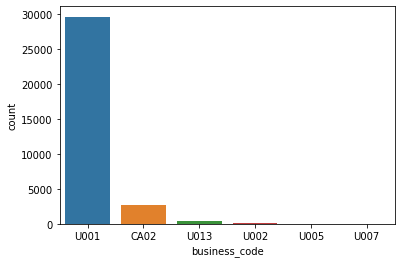

In [41]:
sns.countplot(x = train['business_code'])

There are only 6 values. 5 of which are from US and 1 from Canada.

#### cust_number

In [42]:
train['cust_number'].value_counts()

0200769623    7265
0200726979    1193
0200762301     985
0200759878     816
0200794332     691
              ... 
0100043928       1
200274078        1
0100034862       1
0100032505       1
0140104530       1
Name: cust_number, Length: 1253, dtype: int64

There are 1253 unique customers or comapny that we have transactions with.

cust_number represent account no of different companies. For eg WAL-MAR has many varities that is WAL-MAR corporation, WAL-MAR systems etc but they have the same cust_number.

#### name_customer

In [43]:
train.name_customer.value_counts()

WAL-MAR foundation     763
WAL-MAR in             737
WAL-MAR associates     732
WAL-MAR corporation    731
WAL-MAR corp           724
                      ... 
ATLANT corp              1
SETT systems             1
FOOD 4                   1
BRUN corporation         1
VILA co                  1
Name: name_customer, Length: 3592, dtype: int64

Companies Like WAL-MAR, WAL-MAR systems, etc belong to company WAL-MAR and have a unique customer_num to their name hence this column will be dropped.

#### clear_date

In [44]:
clear_month = train.clear_date.dt.month
clear_month.value_counts()

5     3282
4     3081
10    2954
8     2950
12    2941
7     2939
11    2934
3     2793
9     2730
6     2676
2     2275
1     1294
Name: clear_date, dtype: int64

<AxesSubplot:xlabel='clear_date', ylabel='count'>

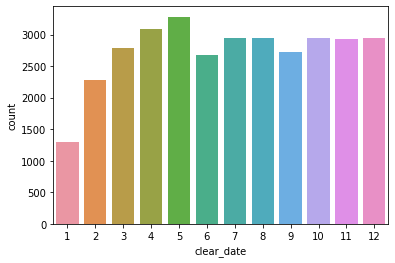

In [45]:
sns.countplot(x=clear_month)

Most of the transactions were completed in May.

#### buisness_year

In [46]:
train.buisness_year.value_counts()

2019.0    32849
Name: buisness_year, dtype: int64

There is only one value so we can drop this column.

#### invoice_currency
The currency of the invoice amount in the document for the invoice

In [47]:
train["invoice_currency"].value_counts()

USD    30189
CAD     2660
Name: invoice_currency, dtype: int64

Since, there are two currencies involved, we can convert either one them. However, as there is not much difference between USD and CAD, there is not much use of converting them.

#### total_open_amount

In [48]:
train['total_open_amount'].describe().apply(lambda x: format(x,'f'))

count      32849.000000
mean       32358.919521
std        41136.731634
min            0.240000
25%         4726.140000
50%        17283.500000
75%        46737.520000
max      1011888.450000
Name: total_open_amount, dtype: object

Automatically binning the amount using pd.qcut.

In [49]:
open_amount_bins = pd.qcut(train['total_open_amount'],q=10)
open_amount_bins.value_counts()

(12801.388, 17283.5]       3291
(0.239, 800.916]           3285
(800.916, 2924.486]        3285
(2924.486, 7054.848]       3285
(7054.848, 12801.388]      3285
(25386.014, 39004.326]     3285
(39004.326, 55006.294]     3285
(55006.294, 80906.124]     3285
(80906.124, 1011888.45]    3285
(17283.5, 25386.014]       3278
Name: total_open_amount, dtype: int64

In [50]:
amount_bins = [0,5000,10000,50000,100000,1100000]
new_open_amount_bin = pd.cut(train['total_open_amount'], bins = amount_bins)

## Binning total amount into different bins

<AxesSubplot:xlabel='total_open_amount', ylabel='count'>

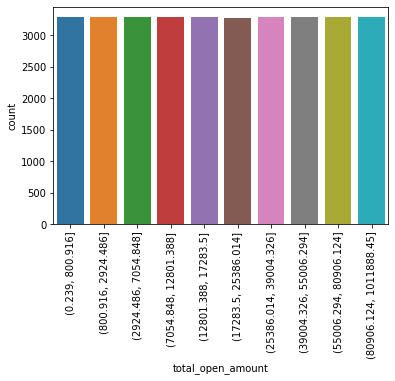

In [51]:
plt.xticks(fontsize=10, rotation=90)
sns.countplot(x=open_amount_bins)

The number of companies in each distribution is same.

#### baseline_create_date

In [52]:
## finding data where document_create_date.1 is not equal to baseline_create_date

train.loc[train["document_create_date.1"]!=train["baseline_create_date"]]

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,pay_delay
10,CA02,0140105847,GORDON F in,2019-01-14,2019.0,2018-12-30,2019-01-12,CAD,18061.92,2019-01-02,CA10,0,2.0
39,CA02,0140106181,THE corp,2019-01-16,2019.0,2018-12-30,2019-01-10,CAD,92.91,2018-12-31,CA10,0,6.0
58,CA02,0140105686,SYSC associates,2019-01-17,2019.0,2018-12-30,2019-01-12,CAD,20666.50,2019-01-02,CA10,0,5.0
71,CA02,0140104429,COSTCO corp,2019-01-18,2019.0,2018-12-31,2019-01-13,CAD,12381.88,2019-01-03,CA10,0,5.0
91,CA02,0140104429,COSTCO llc,2019-01-14,2019.0,2018-12-31,2019-01-13,CAD,2020.19,2019-01-03,CA10,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34386,CA02,0140104423,METRO co,2019-12-25,2019.0,2019-12-16,2019-12-28,CAD,294834.13,2019-12-18,CA10,0,-3.0
34388,CA02,0140104409,LOB associates,2019-12-27,2019.0,2019-12-16,2019-12-28,CAD,138365.28,2019-12-18,CA10,0,-1.0
34431,CA02,0140104409,LOB foundation,2019-12-27,2019.0,2019-12-16,2019-12-28,CAD,65678.85,2019-12-18,CA10,0,-1.0
34435,CA02,0140106316,ALI llc,2019-12-27,2019.0,2019-12-16,2019-12-28,CAD,60028.39,2019-12-18,CA10,0,-1.0


Only for the Canadian companies the baseline and document create date are not same.

Also, there is a significant difference between them. Since it is not of our use we drop it.

#### cust_payment_terms

In [53]:
train.cust_payment_terms.value_counts()

NAA8    13183
NAH4     8680
CA10     2593
NAC6     1143
NAM4      865
        ...  
NAV9        1
NAUI        1
NAV2        1
NA24        1
NAUY        1
Name: cust_payment_terms, Length: 71, dtype: int64

In [54]:
len(dict(train.cust_number.value_counts()))

1253

#### isOpen

In [55]:
train.isOpen.value_counts()

0    32849
Name: isOpen, dtype: int64

It contains only value 0 as in our train set all transactions are complete. Also, it is of no use for our model so we drop it

#### pay_delay

In [56]:
train.pay_delay[train.pay_delay<0].count()

12007

Setting all negative values in pay_delay to 0.

In [57]:
train['pay_delay']=train.pay_delay.apply(lambda x: 0 if x<0 else x)
train.pay_delay[train.pay_delay<0].count()

0

### 2) MULTIVARIATE ANALYSIS

#### Relation between business_code and invoice_currency

In [58]:
train['invoice_currency'].value_counts()

USD    30189
CAD     2660
Name: invoice_currency, dtype: int64

In [59]:
train.groupby("business_code").invoice_currency.value_counts()

business_code  invoice_currency
CA02           CAD                  2659
U001           USD                 29643
U002           USD                    95
U005           USD                     5
U007           USD                     3
U013           USD                   443
               CAD                     1
Name: invoice_currency, dtype: int64

In [60]:
train.groupby("invoice_currency").business_code.value_counts()

invoice_currency  business_code
CAD               CA02              2659
                  U013                 1
USD               U001             29643
                  U013               443
                  U002                95
                  U005                 5
                  U007                 3
Name: business_code, dtype: int64

In [61]:
frame = train.loc[train['business_code'] == 'U013']
frame.loc[frame['invoice_currency']=='CAD']

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,pay_delay
13475,U013,0100052318,PRATT' associates,2019-06-27,2019.0,2019-05-15,2019-06-14,CAD,2962.59,2019-05-15,NAVE,0,13.0


We see that only PRATT company is the only US based company paying in CAD.
Morever they are only 1 transaction so it's not as significant. 
They don't even have any delay so this won't affect our model

#### Relation between total_open_amount and pay_delay

In [62]:
delay_bin = [0,15,30,45,60,300]
delay_bucket = pd.cut(train['pay_delay'], bins = delay_bin)
pd.crosstab(index = new_open_amount_bin, columns =delay_bucket)

pay_delay,"(0, 15]","(15, 30]","(30, 45]","(45, 60]","(60, 300]"
total_open_amount,,,,,
"(0, 5000]",2800,97,97,78,94
"(5000, 10000]",1352,62,58,45,14
"(10000, 50000]",5430,217,149,99,56
"(50000, 100000]",2194,59,15,8,9
"(100000, 1100000]",1031,18,10,7,6


<AxesSubplot:xlabel='total_open_amount', ylabel='count'>

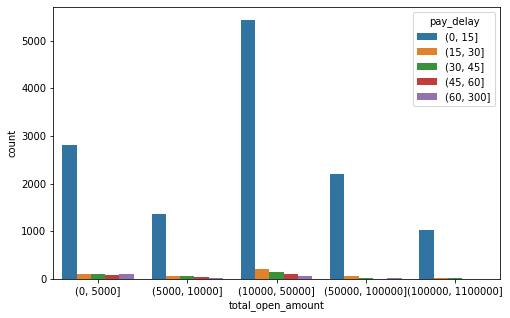

In [63]:
plt.figure(figsize=(8,5))
plt.xlabel("Amount bin")
sns.countplot(x = new_open_amount_bin, hue=delay_bucket)

As we can see from the graph for each bucket, companies completed their transactions in 0-15 days.

In [64]:
train.corr()

,buisness_year,total_open_amount,isOpen,pay_delay
buisness_year,NaN,NaN,NaN,NaN
total_open_amount,NaN,1.000000,NaN,-0.046947
isOpen,NaN,NaN,NaN,NaN
pay_delay,NaN,-0.046947,NaN,1.000000


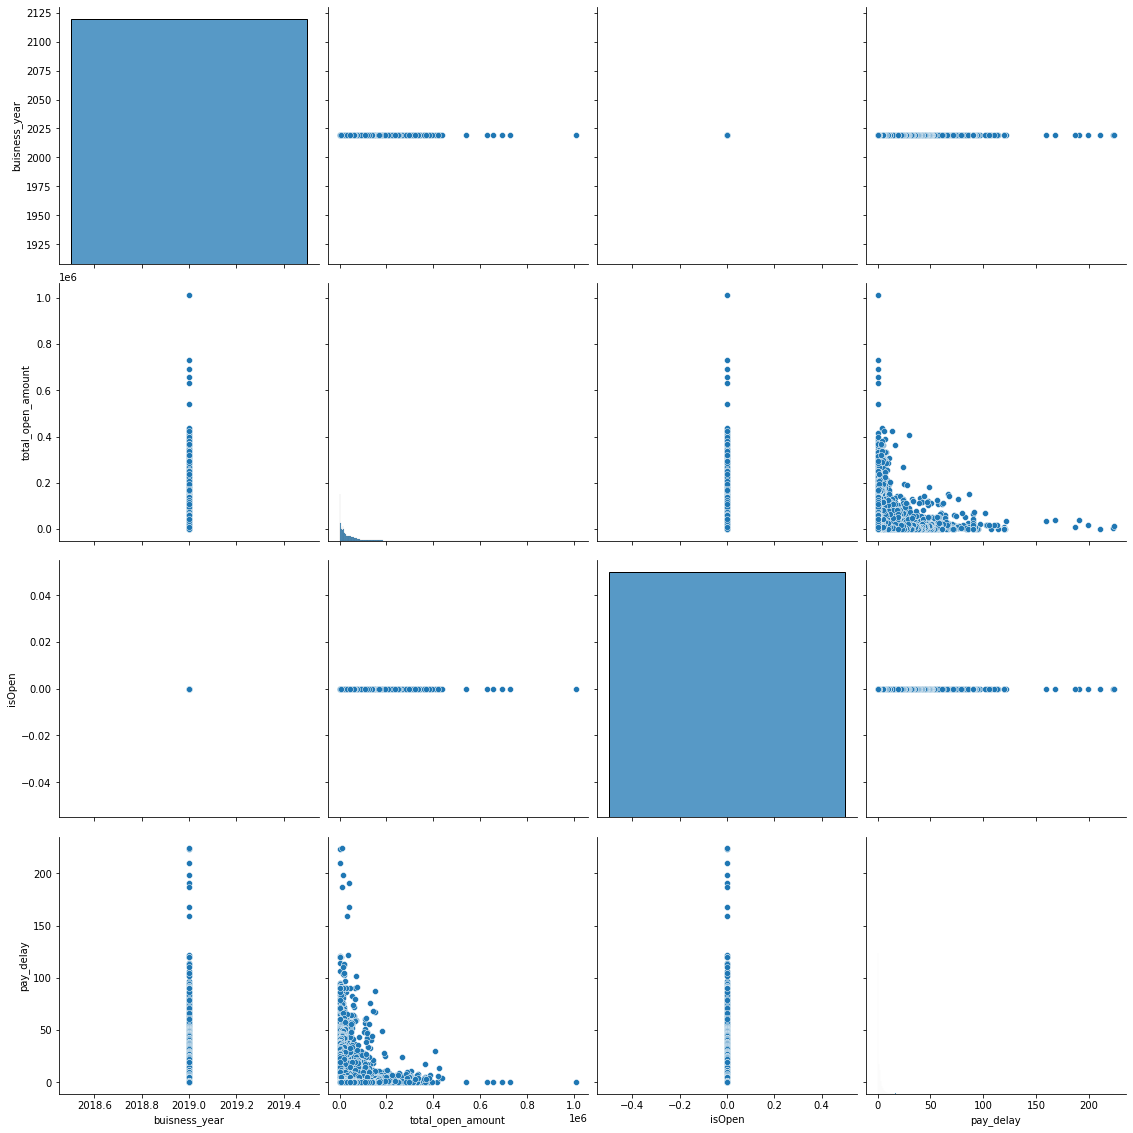

In [65]:
sns.pairplot(train, height=4)

###### The total_open_amount decreases as pay_delay increases and vcie versa. This is called negative correlation.

# Now, we perform Feature Engineering

In [66]:
train.drop(columns=['business_code', 'name_customer','buisness_year','invoice_currency','baseline_create_date', 'cust_payment_terms', 'isOpen'], inplace=True)
train

,cust_number,clear_date,document_create_date.1,due_in_date,total_open_amount,pay_delay
0,0200769623,2019-01-10,2018-12-30,2019-01-14,61712.29,0.0
1,0200769623,2019-01-15,2018-12-30,2019-01-14,11682.88,1.0
2,0200769623,2019-01-10,2018-12-30,2019-01-14,1448.77,0.0
3,0200769623,2019-01-09,2018-12-30,2019-01-14,26831.71,0.0
4,0200769623,2019-01-09,2018-12-30,2019-01-14,38472.57,0.0
...,...,...,...,...,...,...
34438,0200820380,2019-12-31,2019-12-16,2019-12-31,629.54,0.0
34439,0200769623,2019-12-27,2019-12-16,2019-12-31,43482.76,0.0
34440,0140104409,2019-12-27,2019-12-16,2019-12-26,238559.98,1.0
34441,0200769623,2019-12-27,2019-12-16,2019-12-31,6968.45,0.0


Extracting day and month from document_create_date.1 and due_in_date.

In [67]:
train["doc_create_day"] = train["document_create_date.1"].dt.day
train["doc_create_month"] = train["document_create_date.1"].dt.month

In [68]:
train["due_day"] = train["due_in_date"].dt.day
train["due_month"] = train["due_in_date"].dt.month

In [69]:
train

,cust_number,clear_date,document_create_date.1,due_in_date,total_open_amount,pay_delay,doc_create_day,doc_create_month,due_day,due_month
0,0200769623,2019-01-10,2018-12-30,2019-01-14,61712.29,0.0,30,12,14,1
1,0200769623,2019-01-15,2018-12-30,2019-01-14,11682.88,1.0,30,12,14,1
2,0200769623,2019-01-10,2018-12-30,2019-01-14,1448.77,0.0,30,12,14,1
3,0200769623,2019-01-09,2018-12-30,2019-01-14,26831.71,0.0,30,12,14,1
4,0200769623,2019-01-09,2018-12-30,2019-01-14,38472.57,0.0,30,12,14,1
...,...,...,...,...,...,...,...,...,...,...
34438,0200820380,2019-12-31,2019-12-16,2019-12-31,629.54,0.0,16,12,31,12
34439,0200769623,2019-12-27,2019-12-16,2019-12-31,43482.76,0.0,16,12,31,12
34440,0140104409,2019-12-27,2019-12-16,2019-12-26,238559.98,1.0,16,12,26,12
34441,0200769623,2019-12-27,2019-12-16,2019-12-31,6968.45,0.0,16,12,31,12


In [70]:
train.drop(columns=['clear_date', 'document_create_date.1', 'due_in_date'], inplace=True)
train

,cust_number,total_open_amount,pay_delay,doc_create_day,doc_create_month,due_day,due_month
0,0200769623,61712.29,0.0,30,12,14,1
1,0200769623,11682.88,1.0,30,12,14,1
2,0200769623,1448.77,0.0,30,12,14,1
3,0200769623,26831.71,0.0,30,12,14,1
4,0200769623,38472.57,0.0,30,12,14,1
...,...,...,...,...,...,...,...
34438,0200820380,629.54,0.0,16,12,31,12
34439,0200769623,43482.76,0.0,16,12,31,12
34440,0140104409,238559.98,1.0,16,12,26,12
34441,0200769623,6968.45,0.0,16,12,31,12


Extracting the integer part from cust_number

In [71]:
train['cust_no'] = train['cust_number'].str.extract('(\d+)')
train.drop('cust_number',axis=1,inplace=True)
train

,total_open_amount,pay_delay,doc_create_day,doc_create_month,due_day,due_month,cust_no
0,61712.29,0.0,30,12,14,1,0200769623
1,11682.88,1.0,30,12,14,1,0200769623
2,1448.77,0.0,30,12,14,1,0200769623
3,26831.71,0.0,30,12,14,1,0200769623
4,38472.57,0.0,30,12,14,1,0200769623
...,...,...,...,...,...,...,...
34438,629.54,0.0,16,12,31,12,0200820380
34439,43482.76,0.0,16,12,31,12,0200769623
34440,238559.98,1.0,16,12,26,12,0140104409
34441,6968.45,0.0,16,12,31,12,0200769623


In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32849 entries, 0 to 34442
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  32849 non-null  float64
 1   pay_delay          32849 non-null  float64
 2   doc_create_day     32849 non-null  int64  
 3   doc_create_month   32849 non-null  int64  
 4   due_day            32849 non-null  int64  
 5   due_month          32849 non-null  int64  
 6   cust_no            32849 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 3.0+ MB


Since cust_no is the only columns with non numerical value now, we convert its datatype.

In [73]:
train['cust_no']=train['cust_no'].astype(str).astype(float)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32849 entries, 0 to 34442
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  32849 non-null  float64
 1   pay_delay          32849 non-null  float64
 2   doc_create_day     32849 non-null  int64  
 3   doc_create_month   32849 non-null  int64  
 4   due_day            32849 non-null  int64  
 5   due_month          32849 non-null  int64  
 6   cust_no            32849 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 3.0 MB


Splitting into x_train and y_train

In [74]:
y_train = train['pay_delay']
y_train

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
34438    0.0
34439    0.0
34440    1.0
34441    0.0
34442    0.0
Name: pay_delay, Length: 32849, dtype: float64

In [75]:
x_train = train.drop(["pay_delay"], axis=1).copy()
x_train

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cust_no
0,61712.29,30,12,14,1,200769623.0
1,11682.88,30,12,14,1,200769623.0
2,1448.77,30,12,14,1,200769623.0
3,26831.71,30,12,14,1,200769623.0
4,38472.57,30,12,14,1,200769623.0
...,...,...,...,...,...,...
34438,629.54,16,12,31,12,200820380.0
34439,43482.76,16,12,31,12,200769623.0
34440,238559.98,16,12,26,12,140104409.0
34441,6968.45,16,12,31,12,200769623.0


##### Now lets repeat the above steps on val, test, x_test

In [76]:
val

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,pay_delay
0,U001,0200705742,DOT co,2019-12-31,2019.0,2019-12-16,2019-12-31,USD,32622.36,2019-12-16,NAA8,0,0.0
1,U001,0200729942,SA co,2019-12-27,2019.0,2019-12-16,2019-12-31,USD,20566.03,2019-12-16,NAA8,0,-4.0
2,U001,0100056666,KGL FOO foundation,2019-12-24,2019.0,2019-12-16,2019-12-16,USD,10525.20,2019-12-16,NAB1,0,8.0
3,U001,0200705742,DOT corporation,2019-12-31,2019.0,2019-12-16,2020-01-05,USD,59961.47,2019-12-16,NAD1,0,-5.0
4,U001,0200752302,KROGER corporation,2019-12-31,2019.0,2019-12-16,2019-12-31,USD,166827.05,2019-12-16,NAA8,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,U001,0200769623,WAL-MAR in,2020-01-23,2020.0,2020-01-12,2020-01-27,USD,661.11,2020-01-12,NAH4,0,-4.0
1299,U001,0200769623,WAL-MAR,2020-01-22,2020.0,2020-01-12,2020-01-27,USD,46483.59,2020-01-12,NAH4,0,-5.0
1300,U001,0200936373,SUPE systems,2020-01-29,2020.0,2020-01-12,2020-01-27,USD,71109.75,2020-01-12,NAA8,0,2.0
1301,U001,0200769623,WAL-MAR,2020-01-22,2020.0,2020-01-12,2020-01-27,USD,33939.62,2020-01-12,NAH4,0,-5.0


In [77]:
val['pay_delay']=val.pay_delay.apply(lambda x: 0 if x<0 else x)
val.drop(['business_code', 'name_customer', 'clear_date', 'buisness_year', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)
val["doc_create_day"] = val["document_create_date.1"].dt.day
val["doc_create_month"] = val["document_create_date.1"].dt.month

val["due_day"] = val["due_in_date"].dt.day
val["due_month"] = val["due_in_date"].dt.month

val['cust_no'] = val['cust_number'].str.extract('(\d+)')
val.drop('cust_number',axis=1,inplace=True)

val.drop(columns=['document_create_date.1', 'due_in_date'], inplace=True)
val

,total_open_amount,pay_delay,doc_create_day,doc_create_month,due_day,due_month,cust_no
0,32622.36,0.0,16,12,31,12,0200705742
1,20566.03,0.0,16,12,31,12,0200729942
2,10525.20,8.0,16,12,16,12,0100056666
3,59961.47,0.0,16,12,5,1,0200705742
4,166827.05,0.0,16,12,31,12,0200752302
...,...,...,...,...,...,...,...
1298,661.11,0.0,12,1,27,1,0200769623
1299,46483.59,0.0,12,1,27,1,0200769623
1300,71109.75,2.0,12,1,27,1,0200936373
1301,33939.62,0.0,12,1,27,1,0200769623


In [78]:
val['cust_no']=val['cust_no'].astype(str).astype(float)
val

,total_open_amount,pay_delay,doc_create_day,doc_create_month,due_day,due_month,cust_no
0,32622.36,0.0,16,12,31,12,200705742.0
1,20566.03,0.0,16,12,31,12,200729942.0
2,10525.20,8.0,16,12,16,12,100056666.0
3,59961.47,0.0,16,12,5,1,200705742.0
4,166827.05,0.0,16,12,31,12,200752302.0
...,...,...,...,...,...,...,...
1298,661.11,0.0,12,1,27,1,200769623.0
1299,46483.59,0.0,12,1,27,1,200769623.0
1300,71109.75,2.0,12,1,27,1,200936373.0
1301,33939.62,0.0,12,1,27,1,200769623.0


#### Splitting into x_val and y_val

In [79]:
y_val = val['pay_delay']
y_val

0        0.0
1        0.0
2        8.0
3        0.0
4        0.0
        ... 
1298     0.0
1299     0.0
1300     2.0
1301     0.0
1302    60.0
Name: pay_delay, Length: 1303, dtype: float64

In [80]:
x_val = val.drop(["pay_delay"], axis=1).copy()
x_val

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cust_no
0,32622.36,16,12,31,12,200705742.0
1,20566.03,16,12,31,12,200729942.0
2,10525.20,16,12,16,12,100056666.0
3,59961.47,16,12,5,1,200705742.0
4,166827.05,16,12,31,12,200752302.0
...,...,...,...,...,...,...
1298,661.11,12,1,27,1,200769623.0
1299,46483.59,12,1,27,1,200769623.0
1300,71109.75,12,1,27,1,200936373.0
1301,33939.62,12,1,27,1,200769623.0


In [81]:
test['pay_delay']=test.pay_delay.apply(lambda x: 0 if x<0 else x)
test.drop(['business_code', 'name_customer', 'clear_date', 'buisness_year', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

test["doc_create_day"] = test["document_create_date.1"].dt.day
test["doc_create_month"] = test["document_create_date.1"].dt.month

test["due_day"] = test["due_in_date"].dt.day
test["due_month"] = test["due_in_date"].dt.month

test['cust_no'] = test['cust_number'].str.extract('(\d+)')
test.drop('cust_number',axis=1,inplace=True)

test.drop(columns=['document_create_date.1', 'due_in_date'], inplace=True)
test

,total_open_amount,pay_delay,doc_create_day,doc_create_month,due_day,due_month,cust_no
0,59249.03,3.0,12,1,27,1,0100031704
1,7184.83,0.0,13,1,28,1,0200794332
2,5118.19,0.0,13,1,28,1,0200769623
3,23784.11,1.0,13,1,28,1,0200782001
4,59374.46,0.0,13,1,28,1,0200711029
...,...,...,...,...,...,...,...
4175,988.34,4.0,26,2,12,3,0200764795
4176,5507.47,0.0,26,2,12,3,0200769623
4177,22256.28,0.0,26,2,12,3,0200759082
4178,1356.55,0.0,26,2,12,3,0200769623


In [82]:
test['cust_no']=test['cust_no'].astype(str).astype(float)
test

,total_open_amount,pay_delay,doc_create_day,doc_create_month,due_day,due_month,cust_no
0,59249.03,3.0,12,1,27,1,100031704.0
1,7184.83,0.0,13,1,28,1,200794332.0
2,5118.19,0.0,13,1,28,1,200769623.0
3,23784.11,1.0,13,1,28,1,200782001.0
4,59374.46,0.0,13,1,28,1,200711029.0
...,...,...,...,...,...,...,...
4175,988.34,4.0,26,2,12,3,200764795.0
4176,5507.47,0.0,26,2,12,3,200769623.0
4177,22256.28,0.0,26,2,12,3,200759082.0
4178,1356.55,0.0,26,2,12,3,200769623.0


##### Splitting into test_x and test_y

In [83]:
test_y = test['pay_delay']
test_y

0       3.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
4175    4.0
4176    0.0
4177    0.0
4178    0.0
4179    0.0
Name: pay_delay, Length: 4180, dtype: float64

In [84]:
test_x = test.drop(["pay_delay"], axis=1).copy()
test_x

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cust_no
0,59249.03,12,1,27,1,100031704.0
1,7184.83,13,1,28,1,200794332.0
2,5118.19,13,1,28,1,200769623.0
3,23784.11,13,1,28,1,200782001.0
4,59374.46,13,1,28,1,200711029.0
...,...,...,...,...,...,...
4175,988.34,26,2,12,3,200764795.0
4176,5507.47,26,2,12,3,200769623.0
4177,22256.28,26,2,12,3,200759082.0
4178,1356.55,26,2,12,3,200769623.0


In [85]:
x_test.drop(['business_code', 'name_customer', 'clear_date', 'buisness_year', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

x_test["doc_create_day"] = x_test["document_create_date.1"].dt.day
x_test["doc_create_month"] = x_test["document_create_date.1"].dt.month

x_test["due_day"] = x_test["due_in_date"].dt.day
x_test["due_month"] = x_test["due_in_date"].dt.month

x_test['cust_no'] = x_test['cust_number'].str.extract('(\d+)')
x_test.drop('cust_number',axis=1,inplace=True)

x_test.drop(columns=['document_create_date.1', 'due_in_date'], inplace=True)
x_test

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cust_no
0,5069.90,27,2,13,3,0200762301
1,20787.23,27,2,13,3,0200705742
2,19992.18,27,2,27,2,013
3,87769.40,27,2,13,3,0200792734
4,31833.76,27,2,9,3,0140106408
...,...,...,...,...,...,...
9995,55850.46,14,5,26,5,0140106408
9996,24212.00,15,5,30,5,0200915438
9997,19798.67,15,5,30,5,0200457993
9998,1440.00,16,5,16,5,0100027744


In [86]:
x_test['cust_no']=x_test['cust_no'].astype(str).astype(float)
x_test

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cust_no
0,5069.90,27,2,13,3,200762301.0
1,20787.23,27,2,13,3,200705742.0
2,19992.18,27,2,27,2,13.0
3,87769.40,27,2,13,3,200792734.0
4,31833.76,27,2,9,3,140106408.0
...,...,...,...,...,...,...
9995,55850.46,14,5,26,5,140106408.0
9996,24212.00,15,5,30,5,200915438.0
9997,19798.67,15,5,30,5,200457993.0
9998,1440.00,16,5,16,5,100027744.0


# MILESTONE - 3

# Now we perform Feature Selection

<AxesSubplot:>

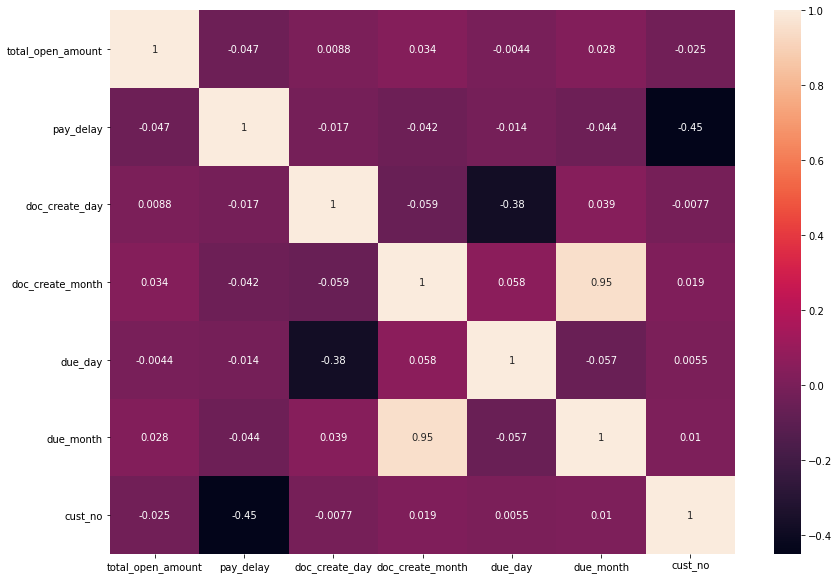

In [87]:
plt.figure(figsize=(14,10))
cor = train.corr()
sns.heatmap(cor,annot=True)

due_month and doc_create_month have high correlation. So, we remove one of them.

In [88]:
x_train = x_train.drop(["due_month"], axis=1).copy()
x_val = x_val.drop(["due_month"], axis=1).copy()
test_x = test_x.drop(["due_month"], axis=1).copy()
x_test = x_test.drop(["due_month"], axis=1).copy()

In [89]:
x_train

,total_open_amount,doc_create_day,doc_create_month,due_day,cust_no
0,61712.29,30,12,14,200769623.0
1,11682.88,30,12,14,200769623.0
2,1448.77,30,12,14,200769623.0
3,26831.71,30,12,14,200769623.0
4,38472.57,30,12,14,200769623.0
...,...,...,...,...,...
34438,629.54,16,12,31,200820380.0
34439,43482.76,16,12,31,200769623.0
34440,238559.98,16,12,26,140104409.0
34441,6968.45,16,12,31,200769623.0


In [90]:
x_val

,total_open_amount,doc_create_day,doc_create_month,due_day,cust_no
0,32622.36,16,12,31,200705742.0
1,20566.03,16,12,31,200729942.0
2,10525.20,16,12,16,100056666.0
3,59961.47,16,12,5,200705742.0
4,166827.05,16,12,31,200752302.0
...,...,...,...,...,...
1298,661.11,12,1,27,200769623.0
1299,46483.59,12,1,27,200769623.0
1300,71109.75,12,1,27,200936373.0
1301,33939.62,12,1,27,200769623.0


In [91]:
test_x

,total_open_amount,doc_create_day,doc_create_month,due_day,cust_no
0,59249.03,12,1,27,100031704.0
1,7184.83,13,1,28,200794332.0
2,5118.19,13,1,28,200769623.0
3,23784.11,13,1,28,200782001.0
4,59374.46,13,1,28,200711029.0
...,...,...,...,...,...
4175,988.34,26,2,12,200764795.0
4176,5507.47,26,2,12,200769623.0
4177,22256.28,26,2,12,200759082.0
4178,1356.55,26,2,12,200769623.0


In [92]:
x_test

,total_open_amount,doc_create_day,doc_create_month,due_day,cust_no
0,5069.90,27,2,13,200762301.0
1,20787.23,27,2,13,200705742.0
2,19992.18,27,2,27,13.0
3,87769.40,27,2,13,200792734.0
4,31833.76,27,2,9,140106408.0
...,...,...,...,...,...
9995,55850.46,14,5,26,140106408.0
9996,24212.00,15,5,30,200915438.0
9997,19798.67,15,5,30,200457993.0
9998,1440.00,16,5,16,100027744.0


# MODELING

As this is a regression model we will use the following models:-
1) Linear Regressor <br />
2) Decision Tree <br/>
3) Random Forest <br />
4) XgBoost

### XGBoost

In [93]:
xgbreg = xgb.XGBRegressor()
xgbreg.fit(x_train, y_train)

pred1 = xgbreg.predict(x_val)

In [94]:
# finding error and accuracy

print("Mean squared error =", round(sm.mean_squared_error(y_val, pred1), 2)) 
print("R2 score =", round(sm.r2_score(y_val, pred1), 2))
print("Accuracy= ", xgbreg.score(x_val,y_val))

Mean squared error = 83.45
R2 score = 0.37
Accuracy=  0.36642347177540857


### Random Forest

In [95]:
ranf = RandomForestRegressor()
ranf.fit(x_train, y_train)
pred2 = ranf.predict(x_val)

In [96]:
# predicting all types of error and accuracy
 
print("Mean squared error =", round(sm.mean_squared_error(y_val, pred2), 2)) 
print("R2 score =", round(sm.r2_score(y_val, pred2), 2))
print("Accuracy= ", ranf.score(x_val,y_val))

Mean squared error = 86.68
R2 score = 0.34
Accuracy=  0.3418774074139268


### DecisionTreeRegressor

In [97]:
dect = DecisionTreeRegressor()
dect.fit(x_train, y_train)
pred3 = dect.predict(x_val)

In [98]:
print("Mean squared error =", round(sm.mean_squared_error(y_val, pred3), 2))  
print("R2 score =", round(sm.r2_score(y_val, pred3), 2))
print("Accuracy= ", dect.score(x_val,y_val))

Mean squared error = 156.88
R2 score = -0.19
Accuracy=  -0.19105902516300288


### LinearRegression

In [99]:
linearReg = LinearRegression()
linearReg.fit(x_train, y_train)
pred5 = linearReg.predict(x_val)

In [100]:
print("Mean squared error =", round(sm.mean_squared_error(y_val, pred5), 2))  
print("R2 score =", round(sm.r2_score(y_val, pred5), 2))
print("Accuracy= ", linearReg.score(x_val,y_val))

Mean squared error = 103.56
R2 score = 0.21
Accuracy=  0.21373821323554176


#### We see that XGBoost gives us the best result out of all. But we still need to perform hyperparameter tunning to avoid overfit.

### Hyperparameter tunning

In [101]:
paras={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In this we will fit and check for best parameters for our model using RandomizedSearchCV

In [102]:
xgb_reg=xgb.XGBRegressor()
random_search=RandomizedSearchCV(xgb_reg,param_distributions=paras,n_iter=5,n_jobs=-1,cv=5,verbose=3)

## For k-fold cross validation our k = 5.

In [103]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [104]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Using these parameters and checking against test

In [105]:
reg_model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=3,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
reg_model.fit(x_train, y_train)
# Predicting the Test Set Results
predicted = reg_model.predict(test_x)

In [106]:
predicted

array([3.0423374, 1.2557168, 0.9611048, ..., 1.5291926, 1.969294 ,
       0.8547147], dtype=float32)

In [107]:
print("Mean squared error =", round(sm.mean_squared_error(test_y, predicted), 2))
print("R2 score =", round(sm.r2_score(test_y, predicted), 2))
print("Accuracy= ", reg_model.score(test_x,test_y))

Mean squared error = 32.78
R2 score = 0.5
Accuracy=  0.49974625569644227


##### XGBoost model after hyperparameter tunning with RandomizedSearchCV gives an accuracy of 49.97%

# Finally, we test our model on test_m

In [108]:
final_predict = reg_model.predict(x_test) ## Final predicted delay
final_predict

array([ 1.0552112,  1.2217878, 36.173794 , ...,  1.6936983,  5.4186673,
        5.9745584], dtype=float32)

In [109]:
final_predict=np.round(final_predict)  ## rounding to nearest integer
final_predict.astype(int)

array([ 1,  1, 36, ...,  2,  5,  6])

We predicted the delay for our test_m set. Now, we are left with finding the clear_date

In [110]:
new_df =pd.DataFrame()  ## new dataframe

Appending the delay predicted column in it

In [111]:
delay=[]
for x in final_predict:
    delay.append(pd.Timedelta(days=x))  ## converting integer values to timedelta
new_df['pay_delay'] = delay
new_df

,pay_delay
0,1 days
1,1 days
2,36 days
3,1 days
4,8 days
...,...
9995,8 days
9996,2 days
9997,2 days
9998,5 days


Now, let's predict the final clear_date

In [112]:
new_df['clear_date'] = tester['due_in_date'] + new_df['pay_delay']
new_df

,pay_delay,clear_date
0,1 days,2020-03-14
1,1 days,2020-03-14
2,36 days,2020-04-03
3,1 days,2020-03-14
4,8 days,2020-03-17
...,...,...
9995,8 days,2020-06-03
9996,2 days,2020-06-01
9997,2 days,2020-06-01
9998,5 days,2020-05-21


# Creating the Aging Bucket

Here we seperate the delay in different categories :- <br/>
1) 0-15 days <br/>
2) 16-30 days <br/>
3) 31-45 days <br/>
4) 46-60 days <br/>
5) >60 days

In [113]:
aging_bucket = []
for x in final_predict:
    if x<=15:
        aging_bucket.append("0-15 days")
    elif x<=30:
        aging_bucket.append("16-30 days")
    elif x<=45:
        aging_bucket.append("31-45 days")
    elif x<=60:
        aging_bucket.append("46-60 days")
    else:
        aging_bucket.append("> 60 days")
new_df['Aging Bucket']= aging_bucket
new_df

,pay_delay,clear_date,Aging Bucket
0,1 days,2020-03-14,0-15 days
1,1 days,2020-03-14,0-15 days
2,36 days,2020-04-03,31-45 days
3,1 days,2020-03-14,0-15 days
4,8 days,2020-03-17,0-15 days
...,...,...,...
9995,8 days,2020-06-03,0-15 days
9996,2 days,2020-06-01,0-15 days
9997,2 days,2020-06-01,0-15 days
9998,5 days,2020-05-21,0-15 days


In [114]:
new_df['Aging Bucket'].value_counts()

0-15 days     9906
46-60 days      37
31-45 days      31
16-30 days      19
> 60 days        7
Name: Aging Bucket, dtype: int64

In [115]:
new_df

,pay_delay,clear_date,Aging Bucket
0,1 days,2020-03-14,0-15 days
1,1 days,2020-03-14,0-15 days
2,36 days,2020-04-03,31-45 days
3,1 days,2020-03-14,0-15 days
4,8 days,2020-03-17,0-15 days
...,...,...,...
9995,8 days,2020-06-03,0-15 days
9996,2 days,2020-06-01,0-15 days
9997,2 days,2020-06-01,0-15 days
9998,5 days,2020-05-21,0-15 days


In [116]:
tester

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,pay_delay
0,U001,0200762301,C&S WH foundation,NaT,2020.0,2020-02-27,2020-03-13,USD,5069.90,2020-02-27,NAC6,1,NaN
1,U001,0200705742,DOT foundation,NaT,2020.0,2020-02-27,2020-03-13,USD,20787.23,2020-02-27,NAA8,1,NaN
2,U001,CCU013,KRAFT F,NaT,2020.0,2020-02-27,2020-02-27,USD,19992.18,2020-02-27,NAX2,1,NaN
3,U001,0200792734,MDV/,NaT,2020.0,2020-02-27,2020-03-13,USD,87769.40,2020-02-27,NAA8,1,NaN
4,CA02,0140106408,WAL-M trust,NaT,2020.0,2020-02-27,2020-03-09,CAD,31833.76,2020-02-28,CA10,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CA02,0140106408,WAL-M corp,NaT,2020.0,2020-05-14,2020-05-26,CAD,55850.46,2020-05-16,CA10,1,NaN
9996,U001,0200915438,GROC corporation,NaT,2020.0,2020-05-15,2020-05-30,USD,24212.00,2020-05-15,NAA8,1,NaN
9997,U001,0200457993,SHAM co,NaT,2020.0,2020-05-15,2020-05-30,USD,19798.67,2020-05-15,NAA8,1,NaN
9998,CA02,0100027744,OMEGA AD trust,NaT,2020.0,2020-05-16,2020-05-16,CAD,1440.00,2020-05-16,CAB1,1,NaN


In [117]:
tester.rename(columns={'clear_date':'predicted_date'},inplace=True)
tester

,business_code,cust_number,name_customer,predicted_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,pay_delay
0,U001,0200762301,C&S WH foundation,NaT,2020.0,2020-02-27,2020-03-13,USD,5069.90,2020-02-27,NAC6,1,NaN
1,U001,0200705742,DOT foundation,NaT,2020.0,2020-02-27,2020-03-13,USD,20787.23,2020-02-27,NAA8,1,NaN
2,U001,CCU013,KRAFT F,NaT,2020.0,2020-02-27,2020-02-27,USD,19992.18,2020-02-27,NAX2,1,NaN
3,U001,0200792734,MDV/,NaT,2020.0,2020-02-27,2020-03-13,USD,87769.40,2020-02-27,NAA8,1,NaN
4,CA02,0140106408,WAL-M trust,NaT,2020.0,2020-02-27,2020-03-09,CAD,31833.76,2020-02-28,CA10,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CA02,0140106408,WAL-M corp,NaT,2020.0,2020-05-14,2020-05-26,CAD,55850.46,2020-05-16,CA10,1,NaN
9996,U001,0200915438,GROC corporation,NaT,2020.0,2020-05-15,2020-05-30,USD,24212.00,2020-05-15,NAA8,1,NaN
9997,U001,0200457993,SHAM co,NaT,2020.0,2020-05-15,2020-05-30,USD,19798.67,2020-05-15,NAA8,1,NaN
9998,CA02,0100027744,OMEGA AD trust,NaT,2020.0,2020-05-16,2020-05-16,CAD,1440.00,2020-05-16,CAB1,1,NaN


In [118]:
tester['Aging Buckets'] = new_df['Aging Bucket']

In [119]:
tester

,business_code,cust_number,name_customer,predicted_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,pay_delay,Aging Buckets
0,U001,0200762301,C&S WH foundation,NaT,2020.0,2020-02-27,2020-03-13,USD,5069.90,2020-02-27,NAC6,1,NaN,0-15 days
1,U001,0200705742,DOT foundation,NaT,2020.0,2020-02-27,2020-03-13,USD,20787.23,2020-02-27,NAA8,1,NaN,0-15 days
2,U001,CCU013,KRAFT F,NaT,2020.0,2020-02-27,2020-02-27,USD,19992.18,2020-02-27,NAX2,1,NaN,31-45 days
3,U001,0200792734,MDV/,NaT,2020.0,2020-02-27,2020-03-13,USD,87769.40,2020-02-27,NAA8,1,NaN,0-15 days
4,CA02,0140106408,WAL-M trust,NaT,2020.0,2020-02-27,2020-03-09,CAD,31833.76,2020-02-28,CA10,1,NaN,0-15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CA02,0140106408,WAL-M corp,NaT,2020.0,2020-05-14,2020-05-26,CAD,55850.46,2020-05-16,CA10,1,NaN,0-15 days
9996,U001,0200915438,GROC corporation,NaT,2020.0,2020-05-15,2020-05-30,USD,24212.00,2020-05-15,NAA8,1,NaN,0-15 days
9997,U001,0200457993,SHAM co,NaT,2020.0,2020-05-15,2020-05-30,USD,19798.67,2020-05-15,NAA8,1,NaN,0-15 days
9998,CA02,0100027744,OMEGA AD trust,NaT,2020.0,2020-05-16,2020-05-16,CAD,1440.00,2020-05-16,CAB1,1,NaN,0-15 days


In [120]:
df1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200782669,SYGMA trust,2019-07-11,2019.0,1.929540e+09,2019-06-25,20190625,2019-06-25,2019-07-10,USD,RV,1.0,NaN,1218.03,2019-06-25,NAA8,1.929540e+09,0
1,U001,0200769623,WAL-MAR foundation,NaT,2020.0,1.930681e+09,2020-03-20,20200320,2020-03-20,2020-04-04,USD,RV,1.0,NaN,943.12,2020-03-20,NAH4,1.930681e+09,1
2,U001,0200726979,BJ'S corp,2019-08-19,2019.0,1.929695e+09,2019-08-03,20190803,2019-08-03,2019-08-18,USD,RV,1.0,NaN,405.75,2019-08-03,NAA8,1.929695e+09,0
3,U001,0200769623,WAL-MAR co,2019-09-23,2019.0,1.929864e+09,2019-09-11,20190911,2019-09-11,2019-09-26,USD,RV,1.0,NaN,3702.21,2019-09-11,NAH4,1.929864e+09,0
4,U001,0200900909,SYSCO systems,2019-09-03,2019.0,1.929755e+09,2019-08-16,20190817,2019-08-16,2019-08-31,USD,RV,1.0,NaN,6251.17,2019-08-16,NAA8,1.929755e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200416837,DEC systems,2019-12-11,2019.0,1.930227e+09,2019-12-06,20191206,2019-12-06,2019-12-08,USD,RV,1.0,NaN,9139.97,2019-12-01,NAM1,1.930227e+09,0
49996,U001,0200762301,C&S WH in,2020-02-25,2020.0,1.930505e+09,2020-02-10,20200209,2020-02-10,2020-02-25,USD,RV,1.0,NaN,18512.63,2020-02-10,NAC6,1.930505e+09,0
49997,U001,0200769623,WAL-MAR corporation,2019-10-08,2019.0,1.929932e+09,2019-09-27,20190926,2019-09-27,2019-10-12,USD,RV,1.0,NaN,14922.49,2019-09-27,NAH4,1.929932e+09,0
49998,CA02,0140106408,WAL-M associates,2019-08-13,2019.0,2.960568e+09,2019-07-26,20190726,2019-07-26,2019-08-05,CAD,RV,1.0,NaN,9139.45,2019-07-26,CA10,2.960568e+09,0


In [121]:
testa = df1.loc[df1.clear_date.isnull(),:]

In [122]:
testa

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,0200769623,WAL-MAR foundation,NaT,2020.0,1.930681e+09,2020-03-20,20200320,2020-03-20,2020-04-04,USD,RV,1.0,NaN,943.12,2020-03-20,NAH4,1.930681e+09,1
5,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930843e+09,2020-05-01,20200430,2020-05-01,2020-05-16,USD,RV,1.0,NaN,13065.20,2020-05-01,NAH4,1.930843e+09,1
6,U001,200744019,TARG corporation,NaT,2020.0,1.930886e+09,2020-05-11,20200511,2020-05-11,2020-05-26,USD,RV,1.0,NaN,11098.89,2020-05-11,NAA8,1.930886e+09,1
10,U001,0200744019,TARG in,NaT,2020.0,1.930781e+09,2020-04-14,20200413,2020-04-14,2020-04-29,USD,RV,1.0,NaN,20577.78,2020-04-14,NAA8,1.930781e+09,1
12,U001,0200726979,BJ'S us,NaT,2020.0,1.930795e+09,2020-04-17,20200416,2020-04-17,2020-05-02,USD,RV,1.0,NaN,107.18,2020-04-17,NAA8,1.930795e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49980,U001,0200762301,C&S WH llc,NaT,2020.0,1.930801e+09,2020-04-21,20200419,2020-04-21,2020-06-25,USD,RV,1.0,NaN,8642.65,2020-04-21,NAGD,1.930801e+09,1
49985,U001,0200769623,WAL-MAR systems,NaT,2020.0,1.930622e+09,2020-03-09,20200308,2020-03-09,2020-03-24,USD,RV,1.0,NaN,7569.86,2020-03-09,NAH4,1.930622e+09,1
49988,U001,0200794332,COST foundation,NaT,2020.0,1.930796e+09,2020-04-22,20200416,2020-04-22,2020-05-12,USD,RV,1.0,NaN,33459.97,2020-04-22,NA84,1.930796e+09,1
49989,U001,0200418007,AM foundation,NaT,2020.0,1.930818e+09,2020-04-23,20200423,2020-04-23,2020-05-08,USD,RV,1.0,NaN,7906.08,2020-04-23,NAA8,1.930818e+09,1


In [123]:
new_df

,pay_delay,clear_date,Aging Bucket
0,1 days,2020-03-14,0-15 days
1,1 days,2020-03-14,0-15 days
2,36 days,2020-04-03,31-45 days
3,1 days,2020-03-14,0-15 days
4,8 days,2020-03-17,0-15 days
...,...,...,...
9995,8 days,2020-06-03,0-15 days
9996,2 days,2020-06-01,0-15 days
9997,2 days,2020-06-01,0-15 days
9998,5 days,2020-05-21,0-15 days


In [124]:
pred_date = new_df['clear_date']
pred_date

0      2020-03-14
1      2020-03-14
2      2020-04-03
3      2020-03-14
4      2020-03-17
          ...    
9995   2020-06-03
9996   2020-06-01
9997   2020-06-01
9998   2020-05-21
9999   2020-06-04
Name: clear_date, Length: 10000, dtype: datetime64[ns]

In [125]:
tester['predicted_date'] = pred_date
tester

,business_code,cust_number,name_customer,predicted_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,pay_delay,Aging Buckets
0,U001,0200762301,C&S WH foundation,2020-03-14,2020.0,2020-02-27,2020-03-13,USD,5069.90,2020-02-27,NAC6,1,NaN,0-15 days
1,U001,0200705742,DOT foundation,2020-03-14,2020.0,2020-02-27,2020-03-13,USD,20787.23,2020-02-27,NAA8,1,NaN,0-15 days
2,U001,CCU013,KRAFT F,2020-04-03,2020.0,2020-02-27,2020-02-27,USD,19992.18,2020-02-27,NAX2,1,NaN,31-45 days
3,U001,0200792734,MDV/,2020-03-14,2020.0,2020-02-27,2020-03-13,USD,87769.40,2020-02-27,NAA8,1,NaN,0-15 days
4,CA02,0140106408,WAL-M trust,2020-03-17,2020.0,2020-02-27,2020-03-09,CAD,31833.76,2020-02-28,CA10,1,NaN,0-15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CA02,0140106408,WAL-M corp,2020-06-03,2020.0,2020-05-14,2020-05-26,CAD,55850.46,2020-05-16,CA10,1,NaN,0-15 days
9996,U001,0200915438,GROC corporation,2020-06-01,2020.0,2020-05-15,2020-05-30,USD,24212.00,2020-05-15,NAA8,1,NaN,0-15 days
9997,U001,0200457993,SHAM co,2020-06-01,2020.0,2020-05-15,2020-05-30,USD,19798.67,2020-05-15,NAA8,1,NaN,0-15 days
9998,CA02,0100027744,OMEGA AD trust,2020-05-21,2020.0,2020-05-16,2020-05-16,CAD,1440.00,2020-05-16,CAB1,1,NaN,0-15 days


In [126]:
tester['pay_delay'] =new_df['pay_delay']
tester

,business_code,cust_number,name_customer,predicted_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,pay_delay,Aging Buckets
0,U001,0200762301,C&S WH foundation,2020-03-14,2020.0,2020-02-27,2020-03-13,USD,5069.90,2020-02-27,NAC6,1,1 days,0-15 days
1,U001,0200705742,DOT foundation,2020-03-14,2020.0,2020-02-27,2020-03-13,USD,20787.23,2020-02-27,NAA8,1,1 days,0-15 days
2,U001,CCU013,KRAFT F,2020-04-03,2020.0,2020-02-27,2020-02-27,USD,19992.18,2020-02-27,NAX2,1,36 days,31-45 days
3,U001,0200792734,MDV/,2020-03-14,2020.0,2020-02-27,2020-03-13,USD,87769.40,2020-02-27,NAA8,1,1 days,0-15 days
4,CA02,0140106408,WAL-M trust,2020-03-17,2020.0,2020-02-27,2020-03-09,CAD,31833.76,2020-02-28,CA10,1,8 days,0-15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CA02,0140106408,WAL-M corp,2020-06-03,2020.0,2020-05-14,2020-05-26,CAD,55850.46,2020-05-16,CA10,1,8 days,0-15 days
9996,U001,0200915438,GROC corporation,2020-06-01,2020.0,2020-05-15,2020-05-30,USD,24212.00,2020-05-15,NAA8,1,2 days,0-15 days
9997,U001,0200457993,SHAM co,2020-06-01,2020.0,2020-05-15,2020-05-30,USD,19798.67,2020-05-15,NAA8,1,2 days,0-15 days
9998,CA02,0100027744,OMEGA AD trust,2020-05-21,2020.0,2020-05-16,2020-05-16,CAD,1440.00,2020-05-16,CAB1,1,5 days,0-15 days


In [127]:
inv = testa['invoice_id']
inv = list(inv)

In [128]:
tester['invoice_id'] = inv

In [129]:
tester

,business_code,cust_number,name_customer,predicted_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,pay_delay,Aging Buckets,invoice_id
0,U001,0200762301,C&S WH foundation,2020-03-14,2020.0,2020-02-27,2020-03-13,USD,5069.90,2020-02-27,NAC6,1,1 days,0-15 days,1.930681e+09
1,U001,0200705742,DOT foundation,2020-03-14,2020.0,2020-02-27,2020-03-13,USD,20787.23,2020-02-27,NAA8,1,1 days,0-15 days,1.930843e+09
2,U001,CCU013,KRAFT F,2020-04-03,2020.0,2020-02-27,2020-02-27,USD,19992.18,2020-02-27,NAX2,1,36 days,31-45 days,1.930886e+09
3,U001,0200792734,MDV/,2020-03-14,2020.0,2020-02-27,2020-03-13,USD,87769.40,2020-02-27,NAA8,1,1 days,0-15 days,1.930781e+09
4,CA02,0140106408,WAL-M trust,2020-03-17,2020.0,2020-02-27,2020-03-09,CAD,31833.76,2020-02-28,CA10,1,8 days,0-15 days,1.930795e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CA02,0140106408,WAL-M corp,2020-06-03,2020.0,2020-05-14,2020-05-26,CAD,55850.46,2020-05-16,CA10,1,8 days,0-15 days,1.930801e+09
9996,U001,0200915438,GROC corporation,2020-06-01,2020.0,2020-05-15,2020-05-30,USD,24212.00,2020-05-15,NAA8,1,2 days,0-15 days,1.930622e+09
9997,U001,0200457993,SHAM co,2020-06-01,2020.0,2020-05-15,2020-05-30,USD,19798.67,2020-05-15,NAA8,1,2 days,0-15 days,1.930796e+09
9998,CA02,0100027744,OMEGA AD trust,2020-05-21,2020.0,2020-05-16,2020-05-16,CAD,1440.00,2020-05-16,CAB1,1,5 days,0-15 days,1.930818e+09


In [130]:
tester.to_csv('Final Predicted.csv')